In [2]:
import pandas as pd

## 数据预处理

In [3]:
# 读取前一百万行数据
df=pd.read_csv("taobao.csv",nrows=1000000)
df

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...
999995,68343951,314963109,1,449ipj0,1488,2014-12-11 18
999996,2227874,163304532,1,99nfav7,5232,2014-11-28 18
999997,82479585,282680033,1,NaN,3397,2014-12-12 01
999998,135803085,59871920,1,NaN,5027,2014-12-06 10


In [197]:
# 查看每列缺失值个数
df.isna().sum()   # 等同于df.isfull().sum()
# 也可以查看每行缺失值 True 表示缺失
df.isna().any(axis=1)

# # 查看数据基本信息
# df.info()

0         False
1         False
2         False
3         False
4         False
          ...  
926259    False
926260    False
926261    False
926262    False
926263    False
Length: 926264, dtype: bool

In [4]:
df.isna().sum()
df = df.drop("user_geohash",axis=1)  # 缺失值太多 直接删除
df.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [5]:
# 用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
df=df.rename(columns={"user_id":"用户ID","item_id":"商品ID","behavior_type":"行为类型","item_category":"商品品类ID","time":"时间"})
df
df["日期"]=df["时间"].str[0:10]
df["time"]=df["时间"].str[11:]
df

,用户ID,商品ID,行为类型,商品品类ID,时间,日期,time
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21
...,...,...,...,...,...,...,...
999995,68343951,314963109,1,1488,2014-12-11 18,2014-12-11,18
999996,2227874,163304532,1,5232,2014-11-28 18,2014-11-28,18
999997,82479585,282680033,1,3397,2014-12-12 01,2014-12-12,01
999998,135803085,59871920,1,5027,2014-12-06 10,2014-12-06,10


In [6]:
df=df.drop(("时间"),axis=1)
df = df.rename(columns={"time":"时间"})
df

,用户ID,商品ID,行为类型,商品品类ID,日期,时间
0,98047837,232431562,1,4245,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16,21
...,...,...,...,...,...,...
999995,68343951,314963109,1,1488,2014-12-11,18
999996,2227874,163304532,1,5232,2014-11-28,18
999997,82479585,282680033,1,3397,2014-12-12,01
999998,135803085,59871920,1,5027,2014-12-06,10


In [194]:
df= df.drop_duplicates()
df.reset_index(drop = True,inplace=True) # 必须要加drop = True
df= df.sort_values(["日期","时间"])
df.reset_index(drop = True,inplace=True)
df[df["商品品类ID"]==8]

,用户ID,商品ID,行为类型,商品品类ID,日期,时间,星期几,时刻
10350,105278727,120774719,1,8,2014-11-18,13,Tuesday,中午
66242,104164603,49504437,1,8,2014-11-20,14,Thursday,下午
87925,105417760,382549345,1,8,2014-11-21,10,Friday,上午
121111,141603737,225124153,1,8,2014-11-22,16,Saturday,下午
237899,34301104,72819565,1,8,2014-11-26,20,Wednesday,晚上
...,...,...,...,...,...,...,...,...
650854,44109897,259000725,1,8,2014-12-10,20,Wednesday,晚上
650857,44109897,365876258,1,8,2014-12-10,20,Wednesday,晚上
771124,44109897,268660775,1,8,2014-12-13,20,Saturday,晚上
841685,137545874,264852977,1,8,2014-12-16,1,Tuesday,凌晨


## 数据建模
(1)用户流量及购买情况

In [209]:
pv= df[df["行为类型"]==1]["行为类型"].count()  # 用户访问情况 总访问量
cart =df[df["行为类型"]==3]["行为类型"].count()  # 加入购物车
buy =df[df["行为类型"]==4]["行为类型"].count()  # 购买了商品
fav =sum(df["行为类型"]==2)               # 进行收藏
print(f"总访问量为：{pv}")
print(f"加入购物车总量为：{cart}")
print(f"购买总量为：{buy}")
print(f"收藏总量为：{fav}")

总访问量为：868791
加入购物车总量为：27872
购买总量为：9585
收藏总量为：20016


日访问量

In [ ]:
# 以相同日期为分组 把相同日期中 行为类型等于1的求和
df1 = df[df["行为类型"]==1].groupby("日期")["行为类型"].sum().reset_index()
# df1["行为类型"].count()  # 31 统计有多少行
# df1["行为类型"].sum()  # 对行为类型这一列的数值求和
# df1
# df2 = pd.DataFrame(df1)
# df2
# 
df1 = df1.set_index("日期")
df1

用户总量

In [132]:
num = len(df["用户ID"].unique())
print(f"从11-18到12-18中用户数量为{num}")

从11-18到12-18中用户数量为8058


购买行为

In [152]:
num_buy = len(df.loc[df["行为类型"]==4]["用户ID"].unique())
print(f"从11-18到12-18中用户购买商品的人数为{num_buy}")
# num_buy = (df.loc[df["行为类型"]==4]["用户ID"].unique()).size
# print(f"从11-18到12-18中用户购买商品的人数为{num_buy}")

从11-18到12-18中用户购买商品的人数为4120


用户的购物情况

In [8]:
# 数据透视表
df_vlot = df.pivot_table(index="用户ID",columns="行为类型",values="商品ID",aggfunc="count",fill_value=0)

In [9]:
# 未买商品的人数
df_vlot[4].isna().sum()

np.int64(0)

复购率

In [10]:
# df_buy= df_vlot[df_vlot[4]>1][4].count()
df_buy =sum(df_vlot[4]>1)
total_buy = sum(df_vlot[4]>0)
rate = df_buy / total_buy
print(f"复购率为:{round(rate,2)*100}%")

复购率为:52.0%


## 数据可视化

用户行为转化为漏斗图

In [285]:
# 制作数据透视表
df_behavior_data = df.pivot_table(index = "行为类型",values="用户ID",aggfunc="count")
total_actions = df_behavior_data["用户ID"].sum()  # 用户全部的行为类型
total_actions
df_behavior_data
clicks = df_behavior_data.loc[1].sum()   # 用户点击的行为类型次数
pv_ctr = (clicks / total_actions) * 100  # 点击率
print(f"点击率为：{round(pv_ctr)}%")   #
favcart_numbers = df_behavior_data.loc[[2,3]].sum()  # 加入购物车以及收藏的行为类型次数
pv_favcart = favcart_numbers / total_actions * 100
print(f"收藏购物车率为：{round(pv_favcart.iloc[0])}%")
buy_numbers = df_behavior_data.loc[4].sum()  # 购买的行为类型次数
pv_buy = buy_numbers / total_actions *100
print(f"购买率为:{round(pv_buy)}%")
pv_ctr
pv_buy

点击率为：94%
收藏购物车率为：5%
购买率为:1%


np.float64(1.034802173030583)

In [290]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
x = ["点击率","收藏率","购买率"]
y = [pv_ctr,pv_favcart.iloc[0],pv_buy]
data = [[x[i],y[i]]for i in range(len(x))]
c = (
    Funnel().add("商品",data)
    .set_global_opts(title_opts=opts.TitleOpts(title = "漏斗图"))
    .render("funnel.html")
)
c

<_io.TextIOWrapper name='C:\\python代码\\pandas\\funnel.html' mode='r' encoding='cp936'>

购买率高低与人群特征

In [14]:
df_vlot["购买率"] =df_vlot[4] /  df_vlot[df_vlot[1]>0][1]
df_vlot.sort_values(["购买率",4,1],ascending=False,inplace=True)
df_vlot

行为类型,1,2,3,4,购买率
用户ID,,,,,
39095072,2,0,0,2,1.0
129073019,2,0,1,2,1.0
10970833,1,0,0,1,1.0
39912392,1,0,0,1,1.0
79181598,1,0,0,1,1.0
...,...,...,...,...,...
678552,1,0,0,0,0.0
722361,1,0,0,0,0.0
117489231,0,0,0,1,NaN


In [17]:
df_vlot.sort_values(4,ascending=False)  # ascending 从大到小排序

行为类型,1,2,3,4,购买率
用户ID,,,,,
122338823,795,0,84,82,0.103145
123842164,1070,14,57,48,0.044860
51492142,767,28,55,43,0.056063
56560718,503,41,36,33,0.065606
33448326,268,3,19,22,0.082090
...,...,...,...,...,...
118289685,1,0,1,0,0.000000
124912719,1,0,0,0,0.000000
125409680,1,0,0,0,0.000000


In [18]:
df_vlot.sort_values(4)  # 购买率低的用户，购物难度大

行为类型,1,2,3,4,购买率
用户ID,,,,,
136843034,1,0,0,0,0.000000
5187945,1,0,0,0,0.000000
133612359,1,0,0,0,0.000000
133072400,1,0,0,0,0.000000
133007823,1,0,0,0,0.000000
...,...,...,...,...,...
33448326,268,3,19,22,0.082090
56560718,503,41,36,33,0.065606
51492142,767,28,55,43,0.056063


用户流量
查看网民活跃在一星期中的哪一天

In [21]:
df["星期几"] = pd.to_datetime(df["日期"]).dt.day_name()
df

,用户ID,商品ID,行为类型,商品品类ID,日期,时间,星期几
0,112707614,343080076,1,13230,2014-11-18,00,Tuesday
1,112707614,346570272,1,5689,2014-11-18,00,Tuesday
2,116101597,70407447,1,6512,2014-11-18,00,Tuesday
3,116101597,327916552,1,6512,2014-11-18,00,Tuesday
4,117903708,133429705,1,10725,2014-11-18,00,Tuesday
...,...,...,...,...,...,...,...
926259,34475118,276224365,1,13242,2014-12-18,23,Thursday
926260,34475118,22179149,1,11955,2014-12-18,23,Thursday
926261,34475118,202008442,1,11955,2014-12-18,23,Thursday
926262,134636593,334126874,1,11876,2014-12-18,23,Thursday


查看一天中网民的活跃时间段

In [29]:
df["时间"] = df["时间"].astype(int)
df['时刻'] = pd.cut(df['时间'],bins=[-1,5,10,13,18,24],labels=['凌晨','上午','中午','下午','晚上'])
df

,用户ID,商品ID,行为类型,商品品类ID,日期,时间,星期几,时刻
0,112707614,343080076,1,13230,2014-11-18,0,Tuesday,凌晨
1,112707614,346570272,1,5689,2014-11-18,0,Tuesday,凌晨
2,116101597,70407447,1,6512,2014-11-18,0,Tuesday,凌晨
3,116101597,327916552,1,6512,2014-11-18,0,Tuesday,凌晨
4,117903708,133429705,1,10725,2014-11-18,0,Tuesday,凌晨
...,...,...,...,...,...,...,...,...
926259,34475118,276224365,1,13242,2014-12-18,23,Thursday,晚上
926260,34475118,22179149,1,11955,2014-12-18,23,Thursday,晚上
926261,34475118,202008442,1,11955,2014-12-18,23,Thursday,晚上
926262,134636593,334126874,1,11876,2014-12-18,23,Thursday,晚上


创建数据透视表

In [180]:
hours_plot =  pd.pivot_table(df,index="时刻",columns="行为类型",values="用户ID",aggfunc="count",margins=True)
hours_plot

C:\Users\21369\AppData\Local\Temp\ipykernel_27464\2085056151.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hours_plot =  pd.pivot_table(df,index="时刻",columns="行为类型",values="用户ID",aggfunc="count",margins=True)


行为类型,1,2,3,4,All
时刻,,,,,
凌晨,87344,2197,2562,737,92840
上午,133181,3185,4166,1521,142053
中午,116617,2743,3800,1742,124902
下午,198324,4564,6552,2499,211939
晚上,333325,7327,10792,3086,354530
All,868791,20016,27872,9585,926264


In [61]:
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType
from pyecharts import options as opts
c = (
    Bar({"theme":ThemeType.MACARONS})
    .add_xaxis(hours_plot.index[:-1].tolist())
    .add_yaxis("点击数",hours_plot[1][:-1].tolist())
    .add_yaxis("收藏数",hours_plot[2][:-1].tolist())
    .add_yaxis("加购数",hours_plot[3][:-1].tolist())
    .add_yaxis("购买数",hours_plot[4][:-1].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="一天中用户活跃情况"))
    .render("user.html")
)
c

'C:\\python代码\\pandas\\user.html'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
hours_plot_long = hours_plot.reset_index().melt(
    id_vars="时刻",
    var_name="行为类型",
    value_name="数量"
)
hours_plot_long = hours_plot_long[(hours_plot_long["时刻"]!="All" ) & (hours_plot_long["行为类型"]!="All")]
hours_plot = hours_plot_long.groupby(["时刻","行为类型"])["数量"].sum().reset_index()

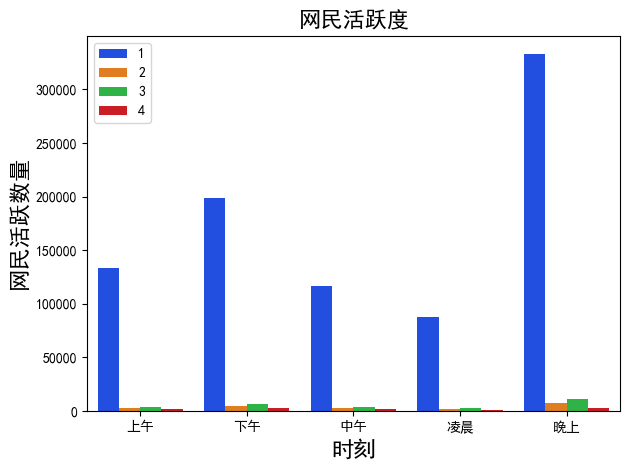

In [165]:
sns.barplot(data = hours_plot,x = "时刻",y ="数量",hue="行为类型",palette="bright")
plt.rcParams["font.family"] = "SimHei"
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("时刻",fontsize=16)
plt.title("网民活跃度",fontsize=16)
plt.ylabel("网民活跃数量",fontsize=16)
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig("网民天活跃度.png")
plt.show()

## 一周中用户活跃时间分布

In [178]:
df3 = df
# 定义英文到中文的映射字典
weekday_map = {
    'Monday': '周一',
    'Tuesday': '周二',
    'Wednesday': '周三',
    'Thursday': '周四',
    'Friday': '周五',
    'Saturday': '周六',
    'Sunday': '周日'
}

# 2. 定义中文星期的正确顺序
chinese_order = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']

# 3. 执行分组操作
df3 = df3.groupby(["星期几","行为类型"])["用户ID"].count().reset_index()

# 4. 将英文星期转换为中文
df3['星期几'] = df3['星期几'].map(weekday_map)

# 5. 转换为有序类别并排序
df3['星期几'] = pd.Categorical(
    df3['星期几'], 
    categories=chinese_order,
    ordered=True
)

# 6. 按星期几排序
df3 = df3.sort_values('星期几')

# 7. 重置索引（可选）
df3 = df3.reset_index(drop=True)
df3 = df3.rename(columns={"用户ID":"用户数量"})
df3

,星期几,行为类型,用户数量
0,周一,1,110741
1,周一,2,2481
2,周一,3,3431
3,周一,4,1160
4,周二,4,1448
5,周二,3,4337
6,周二,2,3171
7,周二,1,137089
8,周三,4,1391
9,周三,2,3136


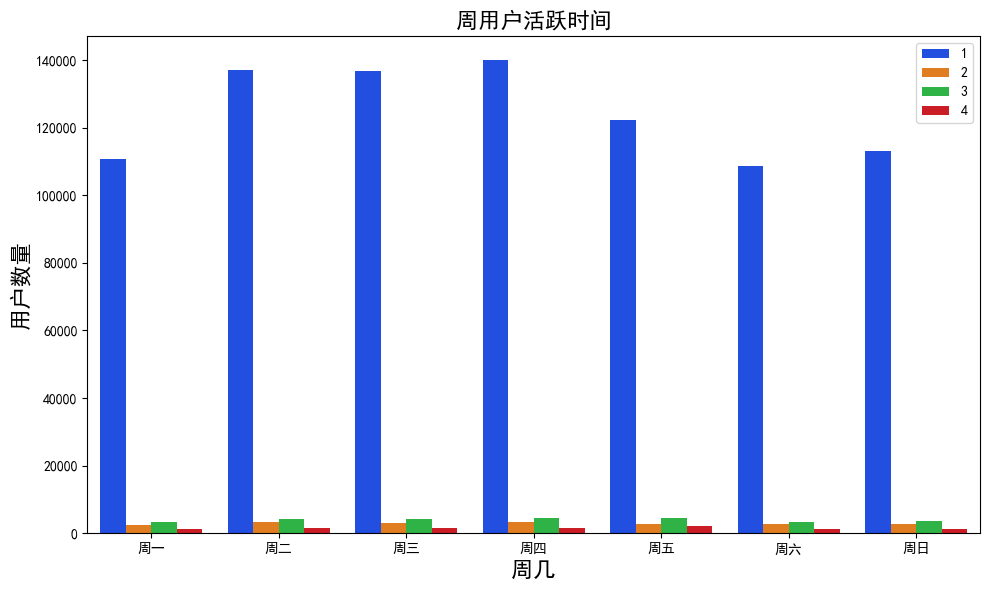

In [179]:
plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "SimHei"
plt.rcParams['axes.unicode_minus'] = False
sns.barplot(data=df3,x="星期几",y="用户数量",hue="行为类型",palette="bright")
plt.xlabel("周几",fontsize=16)
plt.title("周用户活跃时间",fontsize=16)
plt.ylabel("用户数量",fontsize=16)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("周用户活跃时间.png")
plt.show()

## 商品维度分析

In [185]:
df_pivot_item = df.pivot_table(index="商品ID",columns="行为类型",values="用户ID",aggfunc="count",fill_value=0)
df_pivot_item.sort_values([4,3,2,1],ascending=False) # 排序出最受欢迎的商品

行为类型,1,2,3,4
商品ID,,,,
303205878,44,3,2,6
314041390,19,1,1,4
391714355,7,0,3,3
66399540,40,0,2,3
89347608,2,0,2,3
...,...,...,...,...
404557036,1,0,0,0
404558533,1,0,0,0
404558629,1,0,0,0


类品视图

In [189]:
df_pivot_kind = df.pivot_table(index="商品品类ID",columns="行为类型",values="用户ID",aggfunc="count",fill_value=0)
df_pivot_kind.sort_values([1,2,3,4],ascending=False)

行为类型,1,2,3,4
商品品类ID,,,,
1863,28380,812,757,132
13230,25517,583,506,60
5027,24273,569,490,58
5894,23334,616,522,68
6513,21262,542,554,77
...,...,...,...,...
8589,0,0,0,1
10321,0,0,0,1
11059,0,0,0,1


各品类商品的种类

In [196]:
df_pivot_items = df.pivot_table(index="商品品类ID",values="商品ID",aggfunc="count")
df_pivot_items.sort_values("商品ID",ascending=False) # 统计各个商品品类中的商品有多少个

,商品ID
商品品类ID,
1863,30081
13230,26666
5027,25390
5894,24540
6513,22435
...,...
11870,1
11865,1
11853,1
